In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from scipy import stats

In [2]:
df = pd.read_csv('magicpin_assignment.csv', encoding='latin-1')

Different encoding

In [3]:
df.head()

ID  customer_id  merchant_id                         merchant_name  \
0  4181262      1078061       239907                       Barbeque Nation   
1  4181263       800436       303261                     Jayshree Pure Veg   
2  4181265       985816       224635  Pabrai's Fresh & Naturelle Ice Cream   
3  4181266      1079912       156356             Vivo The Designer Couture   
4  4181267       984371       215283                         Frozen Bottle   

   trxn_locality     home_locality   work_locality        date      time  \
0  Kalyani Nagar  B.T. Kawade Road  Santacruz West  2017-11-01  00:00:02   
1  Kalyani Nagar     Kalyani Nagar      Malad East  2017-11-01  00:00:13   
2    Koramangala         Jayanagar       Jayanagar  2017-11-01  00:00:32   
3  Paschim Vihar            Narela          Narela  2017-11-01  00:00:34   
4            HSR               HSR             HSR  2017-11-01  00:00:39   

   first transaction?  funding trxn?  bill size  cashback  followers  
0                   1              0     4989.0      75.0       2997  
1                   1              0      413.0      21.0       9070  
2                   0              0      210.0      17.0       9420  
3                   0              0     3295.0      10.0       5326  
4                   0              0      638.4      40.0       6423

In [4]:
df.describe()

ID   customer_id    merchant_id  first transaction?  \
count  4.461300e+05  4.461300e+05  446130.000000       446130.000000   
mean   4.520097e+06  7.991744e+05  134925.672999            0.103667   
std    1.954116e+05  3.288252e+05  108523.420754            0.304829   
min    4.181262e+06  2.400000e+01     456.000000            0.000000   
25%    4.351085e+06  5.581520e+05   16264.000000            0.000000   
50%    4.521134e+06  9.142660e+05   97259.000000            0.000000   
75%    4.689602e+06  1.080513e+06  241167.000000            0.000000   
max    4.861247e+06  1.192475e+06  407529.000000            1.000000   

       funding trxn?      bill size       cashback      followers  
count  446130.000000  446130.000000  446129.000000  446130.000000  
mean        0.071203     829.117140      30.758163    5000.373102  
std         0.257165    2068.983404      34.383632    2886.266996  
min         0.000000       6.000000       0.000000       1.000000  
25%         0.000000     189.000000      10.000000    2500.000000  
50%         0.000000     382.000000      23.000000    5004.000000  
75%         0.000000     805.000000      43.000000    7499.000000  
max         1.000000  453285.000000     475.000000   10000.000000

- Only about 7% of the transactions provided a cut to MagicPin
- All bill amounts are entertained, ranging from Rs. 6 to Rs. 4,53,285
- Cashback provided (mean Rs. 30) does not have much standard deviation. Max cashback is Rs. 475, which is meagre when compared to the bill sizes
- The most popular profile(s) has/have 10,000 followers

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446130 entries, 0 to 446129
Data columns (total 14 columns):
ID                    446130 non-null int64
customer_id           446130 non-null int64
merchant_id           446130 non-null int64
merchant_name         446130 non-null object
trxn_locality         446130 non-null object
home_locality         446130 non-null object
work_locality         446130 non-null object
date                  446130 non-null object
time                  446130 non-null object
first transaction?    446130 non-null int64
funding trxn?         446130 non-null int64
bill size             446130 non-null float64
cashback              446129 non-null float64
followers             446130 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 47.7+ MB


All but one value are non null. Let's explore the null value row

In [6]:
df[df.isnull().any(axis=1)]

ID  customer_id  merchant_id           merchant_name  \
301039  4659959       167666        88320  Cafe Coffee Day, IFFCO   

       trxn_locality home_locality work_locality        date      time  \
301039     Sector 28    Ardee City     Sector 29  2017-11-21  18:07:20   

        first transaction?  funding trxn?  bill size  cashback  followers  
301039                   0              0   346489.0       NaN       1523

Spending Rs. 3,46,489 at CCD seems to be a data collection error, or an extremely enthusiastic coffee drinker. Let's take a look at the bill size and cashback distributions to ascertain

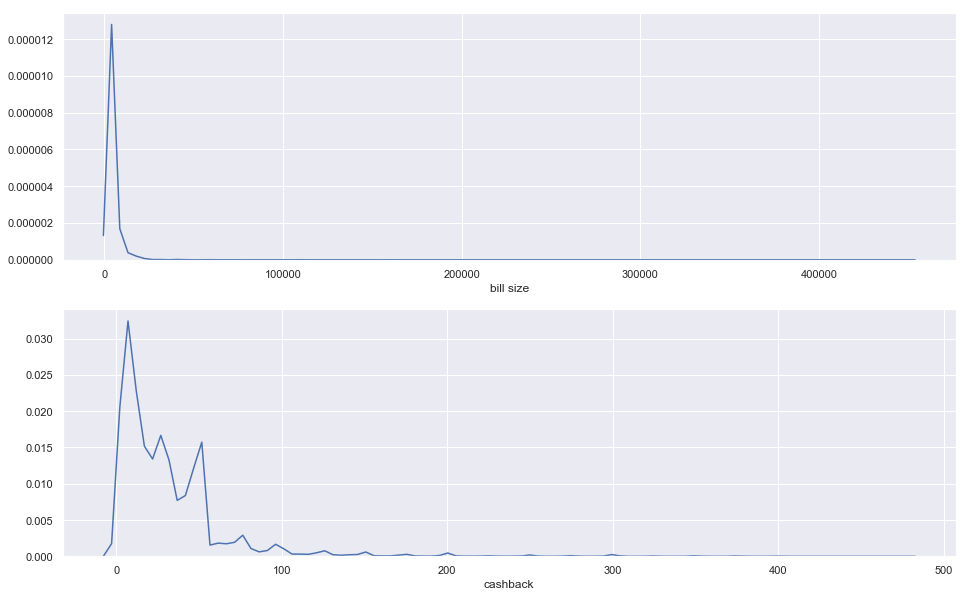

In [7]:
f, ax = plt.subplots(2, 1, figsize=(16, 10))
sns.distplot(df['bill size'], hist=False, ax=ax[0])
sns.distplot(df['cashback'].dropna(), hist=False, ax=ax[1])

Distribution is very tail-heavy

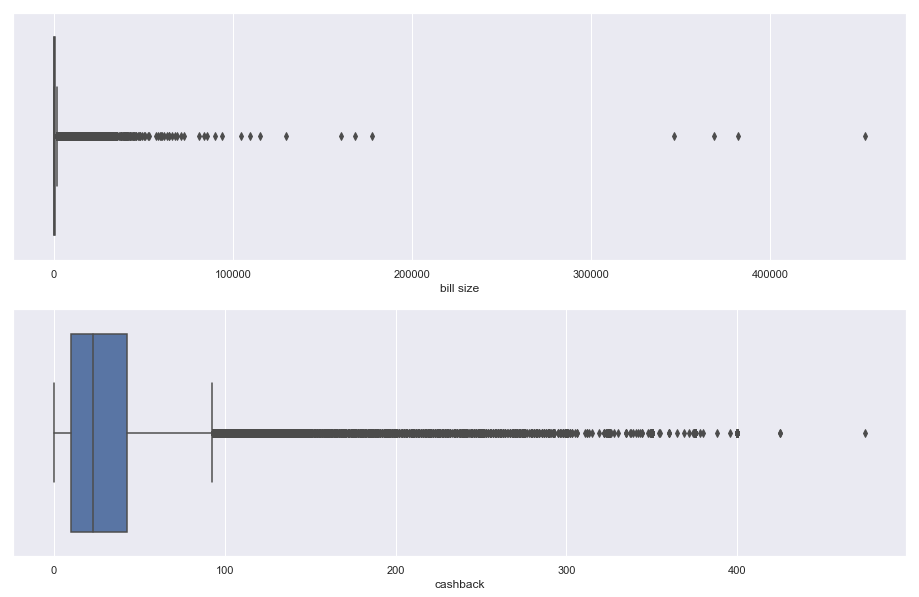

In [8]:
f, ax = plt.subplots(2, 1, figsize=(16, 10))
sns.boxplot(df['bill size'], ax=ax[0])
sns.boxplot(df['cashback'].dropna(), ax=ax[1])

There are a large amount of outliers, which will have to be removed. First, let us remove the row with Null value in cashback

In [9]:
df.dropna(inplace=True)

In [10]:
zscore = stats.zscore(df[['bill size', 'cashback']])

In [11]:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe
df_clipped = df[(np.abs(zscore) < 3).all(axis=1)]

Let's look at the distributions again

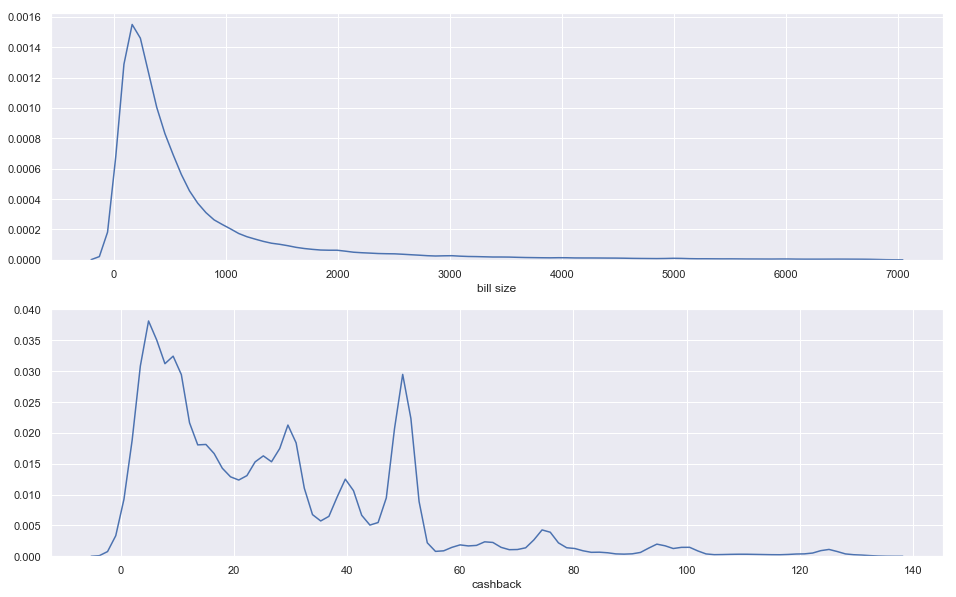

In [12]:
f, ax = plt.subplots(2, 1, figsize=(16, 10))
sns.distplot(df_clipped['bill size'], hist=False, ax=ax[0])
sns.distplot(df_clipped['cashback'].dropna(), hist=False, ax=ax[1])

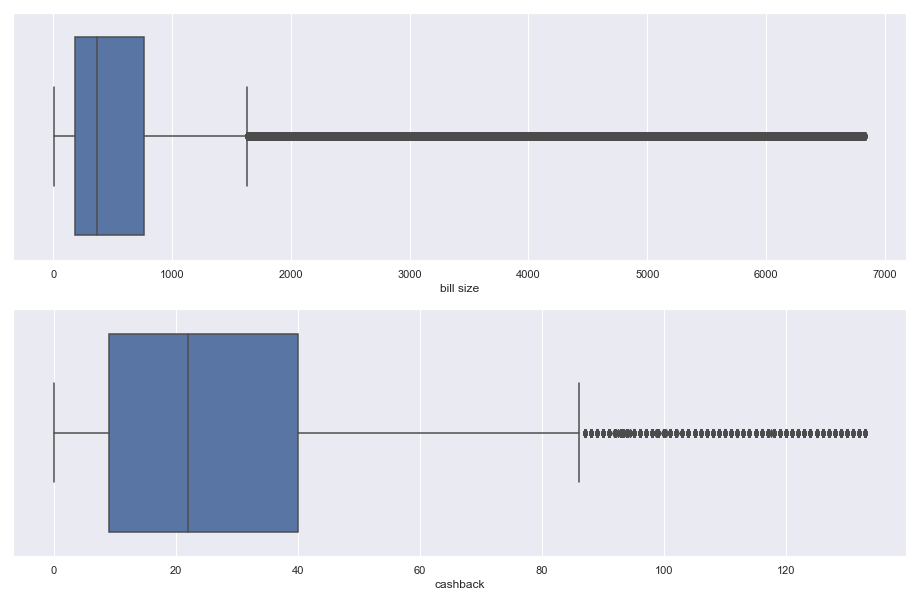

In [13]:
f, ax = plt.subplots(2, 1, figsize=(16, 10))
sns.boxplot(df_clipped['bill size'], ax=ax[0])
sns.boxplot(df_clipped['cashback'].dropna(), ax=ax[1])

In [14]:
merchant_count_df = pd.DataFrame(df_clipped['merchant_name'].value_counts()).reset_index()

In [15]:
merchant_count_df

index  merchant_name
0                                McDonald's          20181
1                            Domino's Pizza          18422
2                                       KFC          11834
3                               Burger King          11418
4                                    Subway           6285
5                                Haldiram's           5621
6                                Big Bazaar           4990
7                                 Pizza Hut           3993
8                           Cafe Coffee Day           2931
9                                     Dmart           2805
10                              Bikanervala           2791
11                           Reliance Fresh           2642
12                            Brand Factory           2131
13                                    DMart           2108
14                                  Easyday           1887
15                           Dunkin' Donuts           1809
16                       Om Sweets & Snacks           1528
17                            Shoppers Stop           1510
18                           More Megastore           1352
19                                Keventers           1248
20                                Starbucks           1203
21                          Reliance Trends           1136
22                                Lifestyle           1117
23                                      Max           1074
24                          The Burger Club            974
25                                  Chaayos            961
26                                Om Sweets            960
27                 McDonald's, Udupi Garden            950
28                        Natural Ice Cream            949
29                              Hira Sweets            919
...                                     ...            ...
30781                       Sunrise Incense              1
30782                  Udupi Veg Restaurant              1
30783                    Barbeque & Biryani              1
30784                     Mitthu Tikki Wala              1
30785                         Choice Liquor              1
30786                            Anna Maria              1
30787                     Tekchand Tiloomal              1
30788           My Style Ladies & Kids Wear              1
30789         Pure Pulses Depatmental Store              1
30790                      Udupi Coffee Bar              1
30791                      The Silver Brush              1
30792              Supper Hero's Food Truck              1
30793                                 Zaiqa              1
30794                      Gold Line Breadz              1
30795                         Grover Bakery              1
30796                 Pinball Thermal Store              1
30797                       HR24 Restaurant              1
30798                     Sadguru Ice Cream              1
30799  Studio Lounge - Hotel Studio Estique              1
30800                       SGR Enterprises              1
30801                        Subway, Panvel              1
30802  Hyderabadi Biryani and Kebabs Corner              1
30803                               Madaari              1
30804                         Slice 'n' Joy              1
30805                                 Deepa              1
30806                     Rajashree Designs              1
30807               Libas Designer Boutique              1
30808             Benzy's Family Restaurant              1
30809                             Good Luck              1
30810         Zolocrust - Hotel Clarks Amer              1

[30811 rows x 2 columns]

Text(0.5,1,'Most popular merchants (Top 50)')

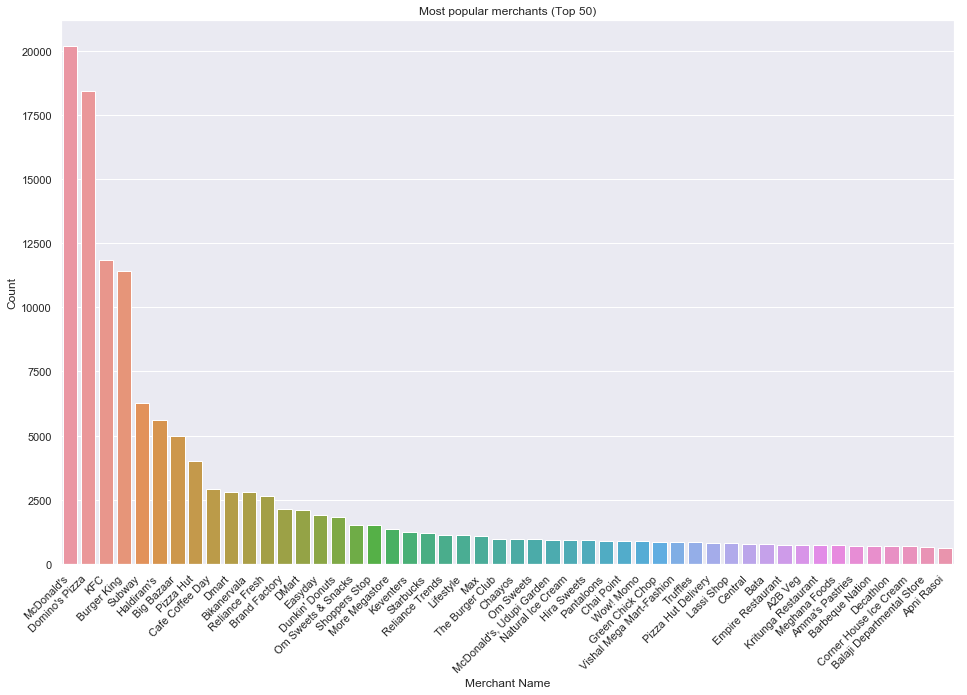

In [16]:
f, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='index', y='merchant_name', data=merchant_count_df[:50])
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Merchant Name')
ax.set_ylabel('Count')
ax.set_title('Most popular merchants (Top 50)')

- McDonald's is the most popular merchant on the platform, followed by Domino's, KFC and Burger King. This is as expected
- Some regional/local vendors are also present in the list

Let's look at the distribution of cashbacks offered by Top 10 merchants

In [17]:
df_top_10 = pd.merge(merchant_count_df[:10], df_clipped, left_on='index', right_on='merchant_name', how='left')

In [18]:
df_top_10.drop(columns=['merchant_name_x', 'index'], inplace=True)
df_top_10.rename(index=str, columns={'merchant_name_y': 'merchant_name'}, inplace=True)

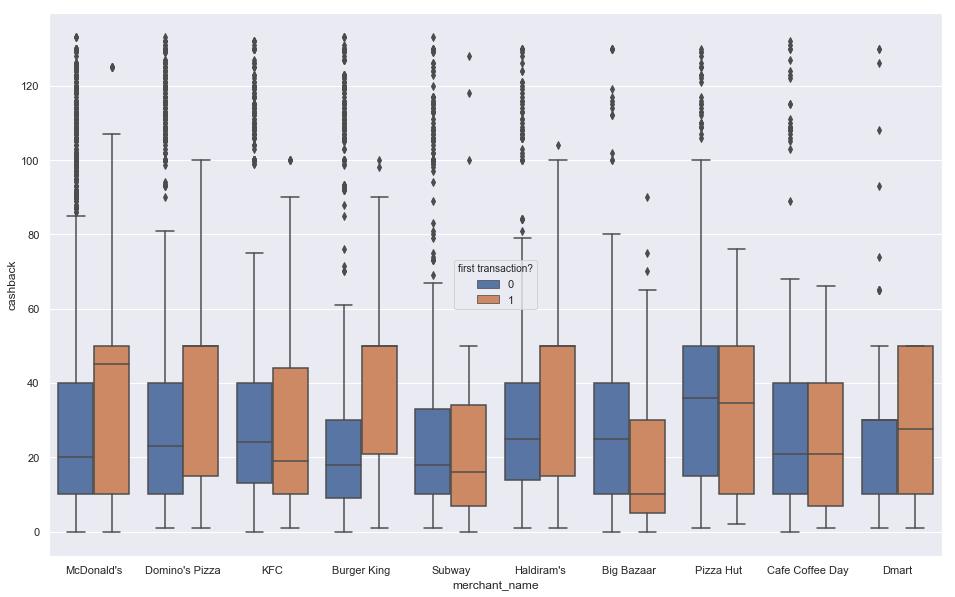

In [19]:
f, ax = plt.subplots(figsize=(16, 10))
sns.boxplot(x='merchant_name', y='cashback', data=df_top_10, hue='first transaction?', ax=ax)

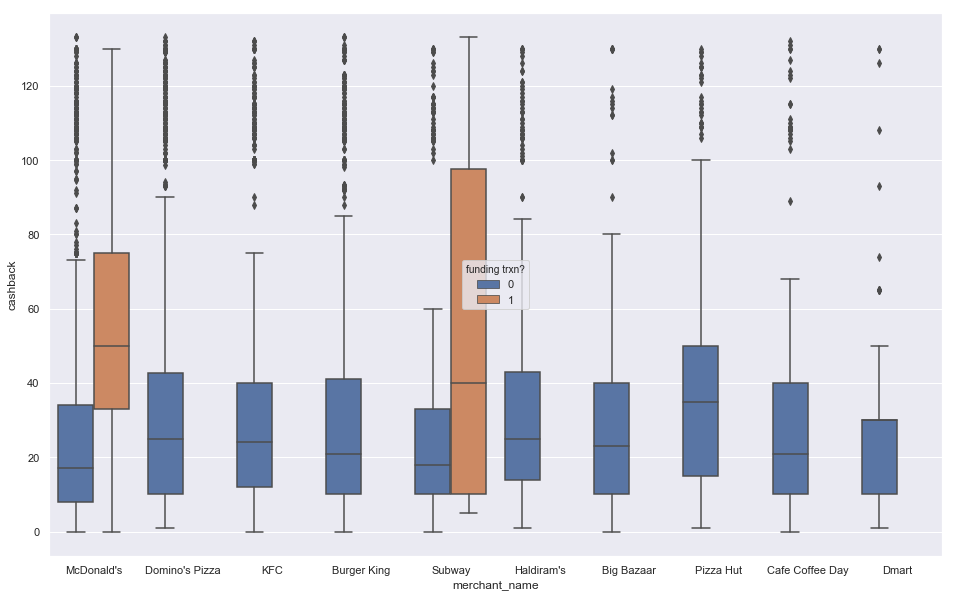

In [20]:
f, ax = plt.subplots(figsize=(16, 10))
sns.boxplot(x='merchant_name', y='cashback', data=df_top_10, hue='funding trxn?', ax=ax)

- Most merchants do not seem to favour first-timers, since mean and even IQR of the cashbacks are comparable
- Funding merchants are favoured by offering much larger cashbacks
- Is the cashback only dependant on first/n-timer transaction? Probably not

Let's check correlation

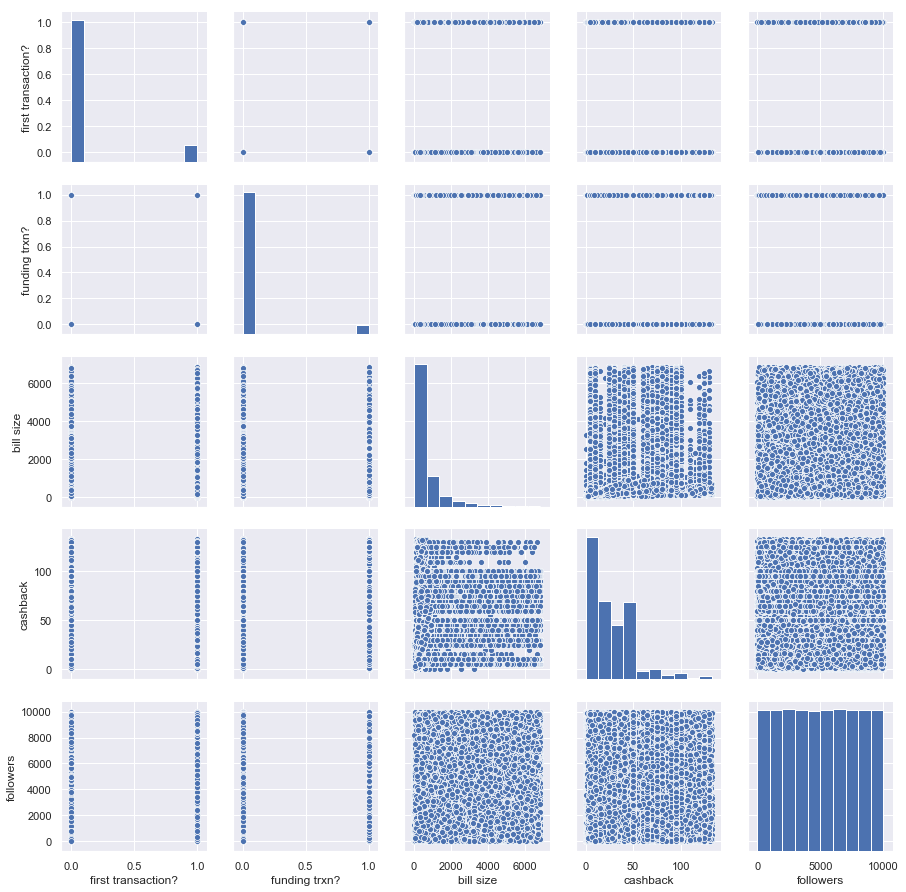

In [21]:
sns.pairplot(df_clipped.loc[:, ['first transaction?', 'funding trxn?', 'bill size', 'cashback', 'followers']])

Some conjectures we can arrive at from the above
1. Cashback amount does not depend on bill size (cashback vs bill size)
2. Popular people do not spend more and also do not get relatively higher cashbacks. One may be the cause of the other (bill size vs followers, cashback vs followers)
3. People of all amounts of followers seem to be equally distributed (followers)

In [22]:
df_clipped[(df_clipped['first transaction?']==1) & (df_clipped['followers'] > 0)].shape[0]

45472

45,472 people had 1 or more followers even before they made their first transaction! Talk about popularity.

Let's take a look at potential outliers. Listing all trxns $\ge$ Rs. 5,000

In [23]:
df_clipped[df_clipped['bill size'] >= 5000].sort_values(['bill size', 'cashback'], ascending=False)

ID  customer_id  merchant_id                    merchant_name  \
160726  4425371       103804       157139                      Blackberrys   
140473  4395399        68087       108260                    Brand Factory   
112783  4352981      1107756       176500                         Pa Pa ya   
70936   4288189      1032104       235408                      Green Field   
326810  4677776       231771       108260                    Brand Factory   
307454  4648321      1073617        58788        AB's - Absolute Barbecues   
326832  4677813       444268       108260                    Brand Factory   
307132  4647796      1073792       177256  3B's - Buddies, Bar & Barbecues   
307436  4648295      1073618       177256  3B's - Buddies, Bar & Barbecues   
416546  4812966      1145765       200156               Dhaba By Claridges   
364947  4735235      1004106       169869                  Sara Silk Store   
333451  4687927       623617        74525                  Barbeque Nation   
172687  4442513      1104333       157416                     Central Jail   
45123   4250307       695977       108201          Brand Factory, Sector 3   
2182    4184939       490467       176919                    Brand Factory   
162658  4428204       378152        97232               Koramangala Social   
350791  4713794      1088020       175625                    Brand Factory   
149843  4409102       539183         1337       My Bar Lounge & Restaurant   
58008   4269338      1094534       270411                            Metro   
257843  4572928      1027730       157140          Big Bazaar, Sahara Mall   
342680  4701967       359028        81281                The Smoke Factory   
217227  4512062       414901       110202                    Kuberan Silks   
68563   4284622       776391       258971                            Metro   
383287  4762388      1037056       199404                    Brand Factory   
272990  4595593      1127900        89542                       McDonald's   
255273  4569185       945699       261749                 Vishal Mega Mart   
119952  4363919       522122        89093                             Slug   
379828  4757294      1175533       193226                        Lifestyle   
379843  4757318       653429       193226                        Lifestyle   
311965  4655088      1075701       234335               Roopali Restaurant   
...         ...          ...          ...                              ...   
172391  4442080      1083489        14041                   Blue Moustache   
376501  4752406       946972        86999                        Lifestyle   
380534  4758322       580402       162242                        Lifestyle   
42847   4246997       917030       144255                   Vicky Garments   
58002   4269331      1058031       108661                          Central   
60434   4272881       501513        54076                      Jawed Habib   
121481  4366735       917030       144255                   Vicky Garments   
266537  4586115      1148496       108816                             Puma   
273488  4596321         2806        83741                          Bindals   
295012  4629136       644994       177810                Natural Ice Cream   
313087  4656865      1128425       194615                 Payal Collection   
323835  4673243       701922       315185                     Utsav sarees   
415246  4810947      1155296         1541                   Otik Cake Shop   
60298   4272689      1092010        64857                     Stars Parade   
70959   4288230      1097042       114278    Pure Play, Liverpool Fc Store   
77683   4298498      1085897       275983             Marudhara Collection   
129117  4378352      1061345       252522          Reliance Trends-Fashion   
173845  4444533       738696        14041                   Blue Moustache   
187194  4465171      1074604        73893                      Royal Dawat   
239290  4545648      1082025       

The z-score elimination method suggested that all transactions above Rs. 7,000 were outliers. Thus, these transactions were removed.

The largest bill prize goes to customer 103804 at **Blackberrys for Rs.6,835**. This is a mens' fashion brand. The customer immediately recieved a **cashback of Rs.85**.

Another contender for the highest bill amount spent was at **Pa Pa Ya for Rs. 6,834**. Pa Pa Ya is a thai restaurant. **Rs. 95 was recieved as cashback**.

It seems that people tend to spend more on food and clothing. Is the amount of cashback provided becoming the reason for non-returning customers? Let's find out

In [24]:
set_of_first_customers = df_clipped[df_clipped['first transaction?']==1]['customer_id']

print(set_of_first_customers.unique().shape[0])
print(set_of_first_customers.shape[0])

45469
45472


3 customers seem to be recorded twice

In [25]:
set_of_first_customers[set_of_first_customers.duplicated()]

88704     1102010
96806     1101987
296376    1149507
Name: customer_id, dtype: int64

Some customers seem to have made multiple first transactions. Let's take a quick detour to look at them

In [26]:
df_clipped[df_clipped['customer_id'] == 1102010]

ID  customer_id  merchant_id        merchant_name trxn_locality  \
88621   4315390      1102010       270601  Navratna Shop 4 All   Uttam Nagar   
88704   4315512      1102010       292738           Shop 4 All   Uttam Nagar   
178984  4452348      1102010       292738           Shop 4 All   Uttam Nagar   
179033  4452417      1102010       270601  Navratna Shop 4 All   Uttam Nagar   

       home_locality work_locality        date      time  first transaction?  \
88621    Uttam Nagar     Sector 23  2017-11-07  17:51:37                   1   
88704    Uttam Nagar     Sector 23  2017-11-07  17:56:47                   1   
178984   Uttam Nagar     Sector 23  2017-11-13  17:50:38                   0   
179033   Uttam Nagar     Sector 23  2017-11-13  17:53:14                   0   

        funding trxn?  bill size  cashback  followers  
88621               0       35.0      18.0       3013  
88704               0      809.0      30.0       7337  
178984              0      697.0      30.0       7010  
179033              0       35.0      18.0        776

This looks a bit suspicious. The person made a transaction at 17:51 on 7<sup>th</sup> and then again 5 minutes later, and both registered as first transactions. Shop was same too, but second name used is a variation of the first.

A point worth noting is that the person also gained 4,324 followers in 5 minutes! Something must be wrong. Was the person demonstrating (possibly to a large audience) a potential security breach that he/she found in the app?

In [27]:
df_clipped[df_clipped['customer_id'] == 1101987]

ID  customer_id  merchant_id        merchant_name trxn_locality  \
88526   4315246      1101987       270601  Navratna Shop 4 All   Uttam Nagar   
96806   4328014      1101987         2172       Domino's Pizza   Uttam Nagar   
100647  4333891      1101987         4954    Rajinder Da Dhaba    Safdarjung   

       home_locality work_locality        date      time  first transaction?  \
88526    Uttam Nagar   Uttam Nagar  2017-11-07  17:44:45                   1   
96806    Uttam Nagar   Uttam Nagar  2017-11-08  14:06:43                   1   
100647   Uttam Nagar   Uttam Nagar  2017-11-08  17:49:34                   0   

        funding trxn?  bill size  cashback  followers  
88526               0       35.0      18.0       3423  
96806               0      221.0      15.0       3535  
100647              0      418.0      50.0       5211

Uttam Nagar seems to be a glitchy locality, particularly 'Navratna Shop 4 All'. Second bill sizes have been consistently bigger till now, as compared to the first bill

In [28]:
df_clipped[df_clipped['customer_id'] == 1149507]

ID  customer_id  merchant_id merchant_name         trxn_locality  \
274049  4597149      1149507        89368  Shake Eat Up  Netaji Subhash Place   
296376  4631317      1149507        89368  Shake Eat Up  Netaji Subhash Place   
302218  4640307      1149507       134831      Net Wear           Kamla Nagar   

         home_locality   work_locality        date      time  \
274049  Prashant Vihar  Prashant Vihar  2017-11-19  20:03:44   
296376  Prashant Vihar  Prashant Vihar  2017-11-21  13:45:03   
302218  Prashant Vihar  Prashant Vihar  2017-11-21  19:12:07   

        first transaction?  funding trxn?  bill size  cashback  followers  
274049                   1              1      218.0      33.0        934  
296376                   1              1      114.0      17.0        502  
302218                   0              0      506.0      45.0       6700

This customer defies the trend we have been seeing. Second bill size was smaller and followers reduced in the second transaction.

But then the customer gained 6,198 followers in ~5.5 hours. Is this amount of change normal?

In [29]:
# Assumption
# Returning customers would also have a record where first transaction = 1
set_of_returning_customers = df_clipped[df_clipped['first transaction?'] == 0]['customer_id']

In [30]:
regular_or_returning_customers = set(set_of_returning_customers) - set(set_of_first_customers)

In [31]:
len(regular_or_returning_customers)

68263

In [32]:
lost_customers = set(set_of_first_customers) - set(set_of_returning_customers)

In [33]:
len(lost_customers)

23702

23,702 customers never went beyond the first transaction (atleast in the month of November). I am willing to say that low cashback amounts are a part, if not a major part, of the cause of leaving customers

What is the transaction trend by date?

In [34]:
df_by_date = df_clipped.groupby('date', as_index=False)['bill size'].sum()

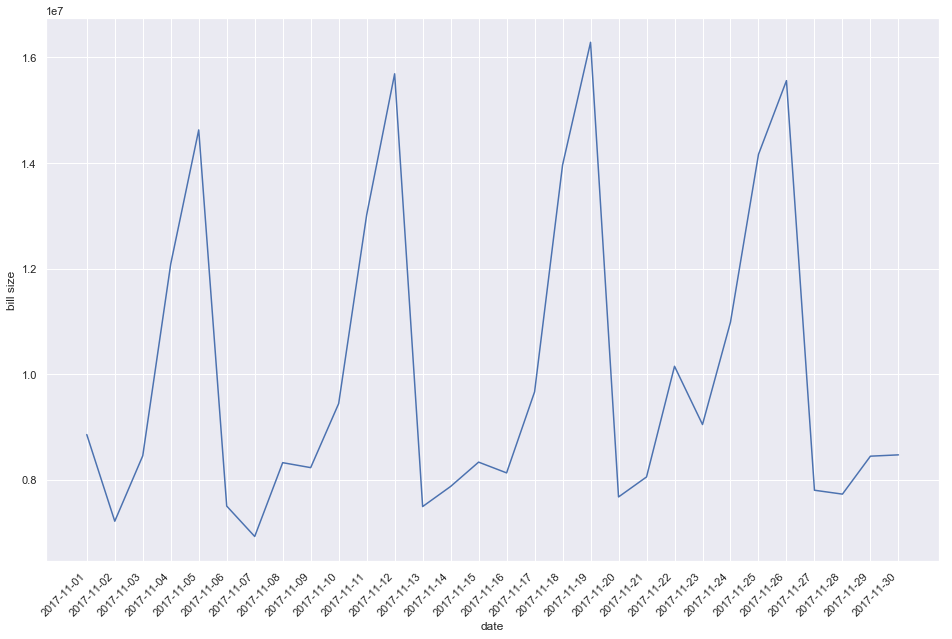

In [35]:
f, ax = plt.subplots(figsize=(16, 10))
plt.xticks(rotation=45, ha='right')
sns.lineplot(x='date', y='bill size', data=df_by_date, ax=ax)

1<sup>st</sup> November was a Wednesday. Thus, we can see that the consumer spending cycle has a very nice weekly trend. Transactions peak on weekends and fall on Monday. Then they gain momentum till the weekend.

November 19<sup>th</sup> (Sunday) saw the highest net transaction amount of Rs. 1.60+ crore

What is the hourly trend?

In [36]:
df_clipped['mod_time'] = df_clipped['time'].apply(lambda x: ':'.join(x.split(':')[:-1]))

d:\work\.dl-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [37]:
df_by_minute = df_clipped.groupby('mod_time', as_index=False)['bill size'].sum()
df_by_minute['mod_time'] = pd.to_datetime(df_by_minute['mod_time'], format='%H:%M').dt.time

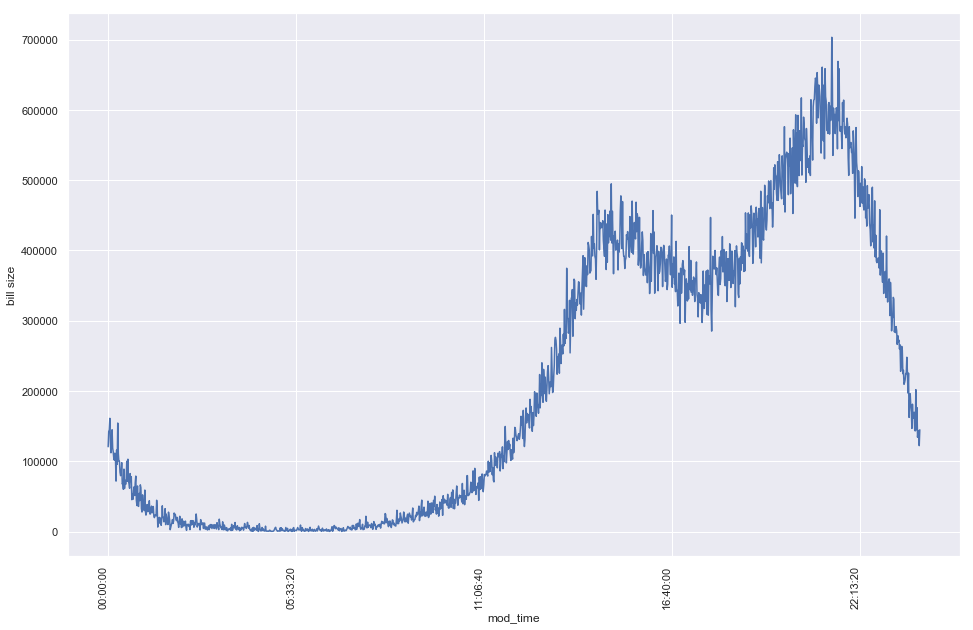

In [38]:
f, ax = plt.subplots(figsize=(16, 10))
plt.xticks(rotation=90, ha='right')
sns.lineplot(x='mod_time', y='bill size', data=df_by_minute, ax=ax)

- Daily cycle begins gaining momentum at around 13:00 and increases through 15:00 (probably lunchtime).
- Then it falls till about 17:00 and starts gaining again and peaks around 21:30-22:00 (probably dinnertime).
- The cycle falls again, and progresses towards the next day

Let's track the most active customers

In [39]:
df_active_customers = pd.DataFrame(df_clipped['customer_id'].value_counts()).reset_index().sort_values('customer_id', ascending=False)

In [40]:
df_active_customers

index  customer_id
0        220524          135
1       1130580          129
2       1063810          122
3        778430          120
4       1057113          113
5        724058          113
6        708590          112
7        994954          107
8        326678          107
9        963326          103
10       524932          100
11       705701           98
12       825703           96
13       114833           91
14      1136339           89
15       912696           87
17      1008322           86
16      1031548           86
18       800016           84
19      1067088           83
20        20178           82
21       973084           82
22       685655           81
23       833452           81
24      1055371           80
25       558523           79
28       510063           78
29       588705           78
27       792261           78
26       689493           78
...         ...          ...
83674    495679            1
83675   1022014            1
83676   1030202            1
83677    816706            1
83678   1142497            1
83679   1140448            1
83680   1087198            1
83662   1081821            1
83660   1024313            1
83640    800842            1
83649    989742            1
83641    280644            1
83642    995627            1
83643   1040689            1
83644   1091545            1
83645   1171953            1
83646    789068            1
83647    807495            1
83648   1186605            1
83650    993832            1
83659   1114605            1
83651   1002020            1
83652    956958            1
83653    408074            1
83654    102911            1
83655   1147389            1
83656   1159675            1
83657    643575            1
83658   1176051            1
113731  1165127            1

[113732 rows x 2 columns]

Text(0.5,1,'50 most active customers')

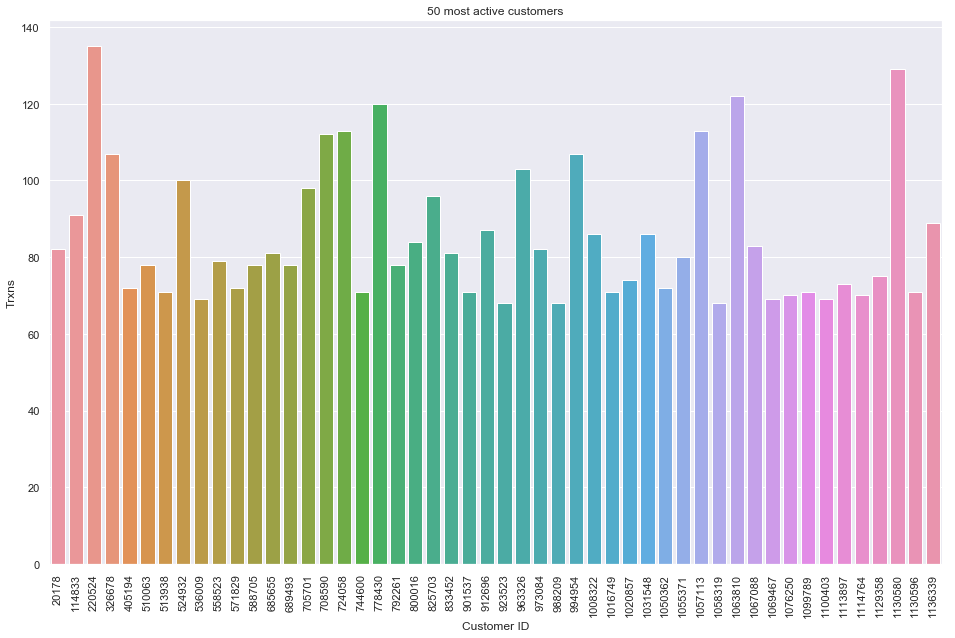

In [41]:
f, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='index', y='customer_id', data=df_active_customers[:50])
plt.xticks(rotation=90)
ax.set_xlabel('Customer ID')
ax.set_ylabel('Trxns')
plt.title('50 most active customers')

Customer 220524 is our most active November customer with 135 trxns. Customer 1130580 is not far behind with 129 November trxns. Let's look at some of their trxns

In [42]:
df_clipped[df_clipped['customer_id'] == 220524]

ID  customer_id  merchant_id                   merchant_name  \
430     4182101       220524        89645        Cut & Style, Huda Market   
1520    4183928       220524         2224                  Domino's Pizza   
1556    4183977       220524         2310                       Pizza Hut   
1668    4184154       220524       303912       Modern Super Market Sec 6   
9436    4195891       220524       113793                 Gurgaon Central   
11653   4199210       220524        54021          Om Restaurant & Sweets   
16359   4206818       220524       291761                  Reliance Fresh   
22493   4216301       220524       228483              Om Sweets & Snacks   
27007   4223486       220524        53610                    Burger Point   
27181   4223754       220524        13150                       Om Sweets   
28105   4225075       220524       292673                  Reliance Fresh   
30669   4228969       220524       161821         More Mega Store-Fashion   
31780   4230610       220524       256491      Dreamcann Foods, Sector 51   
33145   4232635       220524         7938                          Subway   
39156   4241750       220524        53617                      Haldiram's   
45908   4251481       220524       256136             Go Gourment, Fortis   
54280   4263796       220524       282403                         Easyday   
59167   4271009       220524       161821         More Mega Store-Fashion   
59221   4271093       220524        10003                       Raj Foods   
60555   4273054       220524        53617                      Haldiram's   
60596   4273121       220524        80319           The Mind Cafe, Fortis   
61017   4273744       220524        60314                  Baskin Robbins   
62578   4276078       220524        89298         Burger King, HUDA Metro   
63210   4277007       220524         5960              Southy, HUDA Metro   
63627   4277604       220524         2221      Domino's Pizza, HUDA Metro   
64111   4278316       220524        15959          Chai Point, HUDA Metro   
64276   4278529       220524         1046     Eggers Madhouse, HUDA Metro   
64358   4278659       220524        70220          McDonald's, HUDA Metro   
64479   4278828       220524        10164         Fruit Inbox, HUDA Metro   
64827   4279308       220524        99118  The Chocolate Room, Huda Metro   
...         ...          ...          ...                             ...   
271562  4593545       220524        89298         Burger King, HUDA Metro   
272035  4594211       220524        12374      Dunkin' Donuts, HUDA Metro   
272161  4594388       220524         5926                   Chicago Pizza   
272204  4594453       220524         8999        Kung Fu Chow, HUDA Metro   
272383  4594729       220524        15402             Giani's, HUDA Metro   
273984  4597054       220524        99118  The Chocolate Room, Huda Metro   
274026  4597117       220524       256507                       Wow! Momo   
274129  4597250       220524        60407                  Subway, Fortis   
274340  4597564       220524        70220          McDonald's, HUDA Metro   
274497  4597790       220524       177400                  Drunken Monkey   
282918  4610450       220524       161821         More Mega Store-Fashion   
286513  4616066       220524        10003                       Raj Foods   
315946  4661269       220524       264990                  Reliance Fresh   
356581  4722659       220524       228483              Om Sweets & Snacks   
357241  4723631       220524        89298         Burger King, HUDA Metro   
357436  4723931       220524        97301    Wraps Cafe, Huda City Center   
357506  4724040       220524        70220          McDonald's, HUDA Metro   
358268  4725193       220524        53617                      Haldiram's   
358397  4725362       220524       261698                       Keventers   
382729  4761550       220524        15959          Chai Point, HUDA Metro   
383122  4

A lot of this customer's trxns are in and around Fortis, a hospital in Gurgaon (HUDA Metro, Fortis, ...). This seems to imply that either the customer is an employee of the hospital or was an attendant to someone who was admitted in Fortis throughout a large part of November

In [43]:
df_clipped[df_clipped['customer_id'] == 1130580]

ID  customer_id  merchant_id                 merchant_name  \
197020  4480128      1130580       244905              Hotel Sri Balaji   
197448  4480761      1130580       240723             Natural Ice Cream   
212859  4505268      1130580       240263                    McDonald's   
213060  4505625      1130580       240438              Akson Restaurant   
214053  4507137      1130580       242338  Cafe Coffee Day - The Lounge   
214619  4508001      1130580       250973                      Paradise   
216601  4511029      1130580       240540                Karachi Bakery   
217770  4512929      1130580       240420                     Pizza Hut   
219234  4515279      1130580       240268     Sarvi Bakers & Restaurant   
220961  4517928      1130580       240300                      Blue Fox   
221814  4519239      1130580       241202              Sarvi Restaurant   
222953  4520959      1130580       251197                     Angaara 5   
223870  4522378      1130580       241402                    Sarvi Cafe   
224015  4522601      1130580       243202                        Subway   
224269  4523012      1130580       240414           Rayalaseema Ruchulu   
227353  4527962      1130580       240540                Karachi Bakery   
229793  4531534      1130580       241402                    Sarvi Cafe   
232273  4535353      1130580       241042    Ohri's Ruci & Idoni Bistro   
233860  4537756      1130580       241826       Sri Balaji Family Dhaba   
235537  4540263      1130580       240278               Santosh Banjara   
237044  4542390      1130580       240310           Kritunga Restaurant   
237575  4543155      1130580       240765             10 Downing Street   
238219  4544066      1130580       240268     Sarvi Bakers & Restaurant   
239628  4546119      1130580       241342            Hotel Sitara Grand   
239933  4546573      1130580       241202              Sarvi Restaurant   
242390  4550555      1130580       243528                         Dhaba   
244312  4553430      1130580       241025     Rajdhani Thali Restaurant   
252059  4564624      1130580       240285                         Tabla   
254650  4568268      1130580       240278               Santosh Banjara   
255916  4570120      1130580       240770                  The Clay Pot   
...         ...          ...          ...                           ...   
370692  4743480      1130580       241198                    The Dhabha   
374418  4749264      1130580       241198                    The Dhabha   
374962  4750042      1130580       244323           Thalimpu Restaurant   
375886  4751504      1130580       242054                  Almond House   
385205  4765170      1130580       251197                     Angaara 5   
386379  4766792      1130580       243906                     Shubavsar   
389452  4771221      1130580       240524                   Cream Stone   
395424  4780485      1130580       242954              Eagle Boys Pizza   
398630  4785432      1130580       240540                Karachi Bakery   
399923  4787488      1130580       240263                    McDonald's   
401719  4790101      1130580       240273                   Bikanervala   
402723  4791533      1130580       240268     Sarvi Bakers & Restaurant   
403478  4792600      1130580       240264                      Chutneys   
404024  4793411      1130580       240723             Natural Ice Cream   
404565  4794237      1130580       251179                   Burger King   
407448  4798794      1130580       240378              Chinese Pavilion   
407674  4799141      1130580       240268     Sarvi Bakers & Restaurant   
408134  4799826      1130580       251099                    Guilt Trip   
408508  4800397      1130580       243320        The ThickShake Factory   
412015  4805910      1130580       240273                   Bikanervala   
413515  4808292      1130580       241402                    Sarvi Cafe   
414494  4809764      1130580       240

The fact that the first transaction is not actually chronologically first is confusing